In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Bank Churn Modelling.csv")

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [5]:
df.duplicated("CustomerId").sum()

0

In [6]:
df=df.set_index("CustomerId")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [8]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df.replace({"Geography":{"France":2,"Germany":1,"Spain":0}},inplace=True)

In [10]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
df.replace({"Gender":{"Male":0,"Female":1}},inplace=True)

In [12]:
df["Num Of Products"].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [13]:
df.replace({ "Num Of Products":{1:0,2:1,3:1,4:1}},inplace=True)

In [14]:
df["Has Credit Card"].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [15]:
df["Is Active Member"].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [16]:
df["Zero Balance"]=np.where(df["Balance"]>0,1,0)

<Axes: >

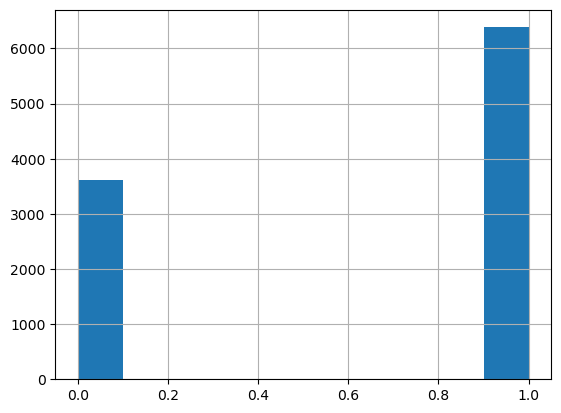

In [17]:
df["Zero Balance"].hist()

In [18]:
df.groupby(["Churn","Geography"]).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

In [19]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [20]:
x=df.drop(["Surname","Churn"],axis=1)

In [21]:
y=df['Churn']

In [22]:
x.shape,y.shape

((10000, 11), (10000,))

In [23]:
df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

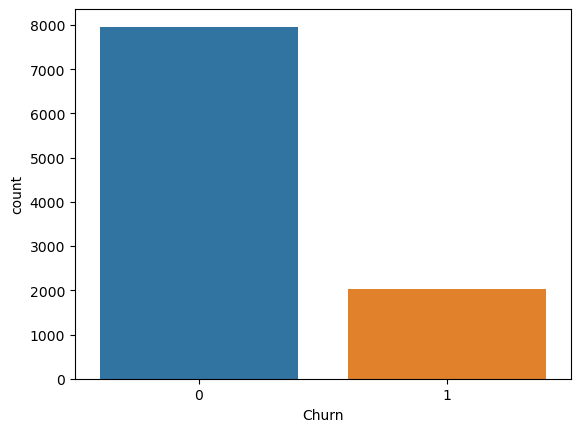

In [24]:
sns.countplot(x='Churn',data=df);

In [25]:
x.shape,y.shape

((10000, 11), (10000,))

#  Random Under Sampling

In [26]:
from imblearn.under_sampling import RandomUnderSampler

In [27]:
rus=RandomUnderSampler(random_state=2529)

In [28]:
x_rus,y_rus=rus.fit_resample(x,y)

In [29]:
x_rus.shape,y_rus.shape,x.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [30]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [31]:
y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

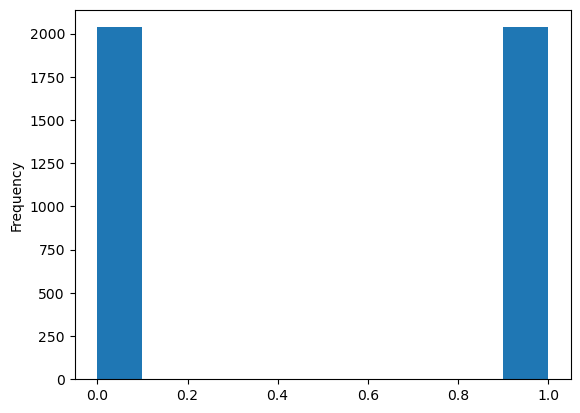

In [32]:
y_rus.plot(kind="hist")

# Random Over Sampling

In [33]:
from imblearn.over_sampling import RandomOverSampler

In [34]:
ros=RandomOverSampler(random_state=2529)

In [35]:
x_ros,y_ros=ros.fit_resample(x,y)

In [36]:
x_ros.shape,y_ros.shape,x.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [37]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [38]:
y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

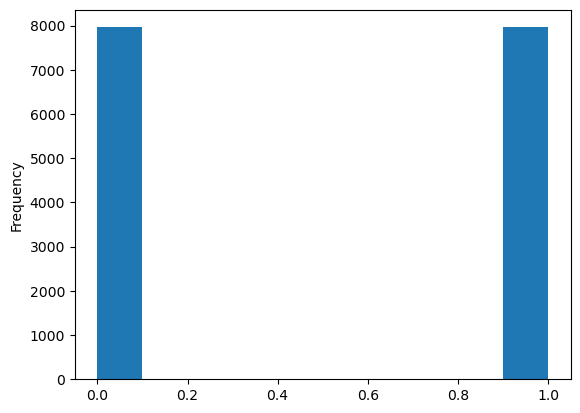

In [39]:
y_ros.plot(kind='hist')

# Train Test split

In [40]:
from sklearn.model_selection import train_test_split

# Split Original Data

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25)

# Split Random Under sample Data

In [42]:
x_train_rus,x_test_rus,y_train_rus,y_test_rus=train_test_split(x_rus,y_rus,test_size=0.3,random_state=25)

# Split Random Over sample Data

In [43]:
x_train_ros,x_test_ros,y_train_ros,y_test_ros=train_test_split(x_ros,y_ros,test_size=0.3,random_state=25)

# Standardize Features

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc=StandardScaler()

# Standardize Original Data

In [46]:
x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [47]:
x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

# Standardize Random Under Sample Data

In [48]:
x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [49]:
x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

# Standardize Random Over Sample Data

In [50]:
x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [51]:
x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

# Support Vector Machine Classifier

In [52]:
from sklearn.svm import SVC

In [53]:
svc=SVC()

In [54]:
svc.fit(x_train,y_train)


SVC()

In [55]:
y_pred=svc.predict(x_test)

# # Model Accuracy

In [56]:
from sklearn.metrics import confusion_matrix,classification_report

In [57]:
confusion_matrix(y_test,y_pred)

array([[2374,   45],
       [ 421,  160]], dtype=int64)

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2419
           1       0.78      0.28      0.41       581

    accuracy                           0.84      3000
   macro avg       0.81      0.63      0.66      3000
weighted avg       0.84      0.84      0.81      3000



# Hyperparameter Tunning

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid={'C':[0.1,1,10],
           'gamma':[1,0.1,0.01],
           'kernel':['rbf'],
           'class_weight':['balanced']}

In [61]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.0s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [62]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [63]:
grid_predictions=grid.predict(x_test)

In [64]:
confusion_matrix(y_test,grid_predictions)

array([[2166,  253],
       [ 365,  216]], dtype=int64)

In [65]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2419
           1       0.46      0.37      0.41       581

    accuracy                           0.79      3000
   macro avg       0.66      0.63      0.64      3000
weighted avg       0.78      0.79      0.79      3000



# Model with Random Under Sampling

In [66]:
svc_rus=SVC()

In [67]:
svc_rus.fit(x_train_rus,y_train_rus)

SVC()

In [68]:
y_pred_rus=svc_rus.predict(x_test_rus)

# Model Accuracy

In [69]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[483, 120],
       [172, 448]], dtype=int64)

In [70]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       603
           1       0.79      0.72      0.75       620

    accuracy                           0.76      1223
   macro avg       0.76      0.76      0.76      1223
weighted avg       0.76      0.76      0.76      1223



# Hyperparameter Tunning

In [72]:
param_grid={'C':[0.1,1,10],
           'gamma':[1,0.1,0.01],
           'kernel':['rbf'],
            'class_weight':['balanced']}

In [73]:
grid_rus= GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_rus.fit(x_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [74]:
print(grid_rus.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=0.01)


In [76]:
grid_predictions_rus=grid_rus.predict(x_test_rus)

In [77]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[456, 147],
       [161, 459]], dtype=int64)

In [78]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       603
           1       0.76      0.74      0.75       620

    accuracy                           0.75      1223
   macro avg       0.75      0.75      0.75      1223
weighted avg       0.75      0.75      0.75      1223



# Model with Random Over Sampling

In [80]:
svc_ros=SVC()

In [81]:
svc_ros.fit(x_train_ros,y_train_ros)

SVC()

In [82]:
y_pred_ros=svc_ros.predict(x_test_ros)

# Model Accuracy

In [83]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[1854,  572],
       [ 551, 1801]], dtype=int64)

In [84]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      2426
           1       0.76      0.77      0.76      2352

    accuracy                           0.76      4778
   macro avg       0.76      0.76      0.76      4778
weighted avg       0.77      0.76      0.76      4778



# Hyperparameter Tunning

In [85]:
param_grid={'C':[0.1,1,10],
           'gamma':[1,0.1,0.01],
           'kernel':['rbf'],
            'class_weight':['balanced']}

In [86]:
grid_ros= GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_ros.fit(x_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   7.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   7.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.7s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [87]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [88]:
grid_predictions_ros=grid_ros.predict(x_test_ros)

In [89]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2064,  362],
       [  75, 2277]], dtype=int64)

In [90]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2426
           1       0.86      0.97      0.91      2352

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778



# Lets Compare

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2419
           1       0.78      0.28      0.41       581

    accuracy                           0.84      3000
   macro avg       0.81      0.63      0.66      3000
weighted avg       0.84      0.84      0.81      3000



In [95]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2419
           1       0.46      0.37      0.41       581

    accuracy                           0.79      3000
   macro avg       0.66      0.63      0.64      3000
weighted avg       0.78      0.79      0.79      3000



In [93]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       603
           1       0.79      0.72      0.75       620

    accuracy                           0.76      1223
   macro avg       0.76      0.76      0.76      1223
weighted avg       0.76      0.76      0.76      1223



In [94]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       603
           1       0.76      0.74      0.75       620

    accuracy                           0.75      1223
   macro avg       0.75      0.75      0.75      1223
weighted avg       0.75      0.75      0.75      1223



In [96]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      2426
           1       0.76      0.77      0.76      2352

    accuracy                           0.76      4778
   macro avg       0.76      0.76      0.76      4778
weighted avg       0.77      0.76      0.76      4778



In [97]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2426
           1       0.86      0.97      0.91      2352

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778



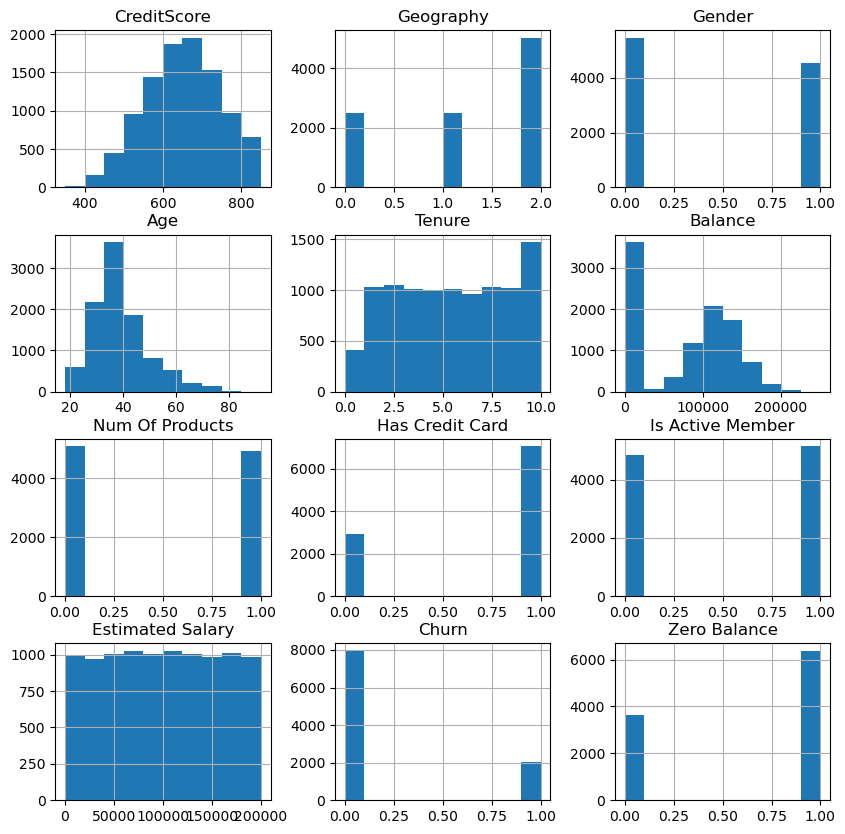

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

df.hist(figsize=(10, 10))
plt.show()

In [100]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Print the correlation matrix
print(corr_matrix)

                  CreditScore  Geography    Gender       Age    Tenure  \
CreditScore          1.000000  -0.007888  0.002857 -0.003965  0.000842   
Geography           -0.007888   1.000000  0.004719 -0.022812 -0.003739   
Gender               0.002857   0.004719  1.000000  0.027544 -0.014733   
Age                 -0.003965  -0.022812  0.027544  1.000000 -0.009997   
Tenure               0.000842  -0.003739 -0.014733 -0.009997  1.000000   
Balance              0.006268  -0.069408 -0.012087  0.028308 -0.012254   
Num Of Products      0.014813  -0.000771  0.005488 -0.072852  0.013423   
Has Credit Card     -0.005458   0.008523 -0.005766 -0.011721  0.022583   
Is Active Member     0.025651  -0.006724 -0.022544  0.085472 -0.028362   
Estimated Salary    -0.001384   0.001369  0.008112 -0.007201  0.007784   
Churn               -0.027094  -0.035943  0.106512  0.285323 -0.014001   
Zero Balance         0.008380  -0.075796 -0.004513  0.034950 -0.015235   

                   Balance  Num Of Pr